In [1]:
import asimov_database as ad
import numpy as np
import pandas as pd
import os
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
# from bqplot import pyplot as plt
import ipywidgets as widgets
from datetime import date, datetime, timedelta



In [ ]:
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('float_format', '{:f}'.format)

In [3]:
reader = ad.ParquetReader()

In [4]:
def table(day_): 
    df_dol = reader.get_parquet(symbol='DOLG20',date=day_,type_='events')
    df_mini_dol = reader.get_parquet(symbol='WDOG20',date=day_,type_='events')
    
    mini_dol = df_mini_dol['incremental'].read().to_pandas()
    mini_dol= mini_dol.dropna()
    mini_dol = mini_dol.reset_index()
    mini_dol['type'] = 'mini_inc'

    dol = df_dol['incremental'].read().to_pandas()
    dol = dol.dropna()
    dol = dol.reset_index()
    dol['type'] = 'dol'

    all_ = pd.concat([dol, mini_dol])
    sorted_ = all_.sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()
    sorted_ = sorted_.drop(['index'], axis =1)
    sorted2_ = sorted_ [sorted_['event_type'] != 'CHANGE'].reset_index()
    sorted2_['gap'] = sorted2_['order_id'] - sorted2_['order_id'].shift(1)
    return sorted2_

In [47]:
df= table('2020-01-09')

In [40]:
def estimativa_step(dataframe, step):
    A=[]
    D= []
    for j in range(0, max(dataframe.index), step):
        A.append(j)
    for i in range(len(A)-1):
        vector= dataframe.gap.values[A[i]:A[1+i]]
        a = np.count_nonzero(vector == 1)
        b = (dataframe.ts.values[A[1+i]] - dataframe.ts.values[A[i]]) / np.timedelta64(1, 's') #+ (dataframe.micro.values[A[1+i]] - dataframe.micro.values[A[i]])
        c= dataframe.order_id.values[A[1+i]] - dataframe.order_id.values[A[i]]
        D.append((c-a)/b)
    dh = pd.DataFrame(D).rename({0:'Values'}, axis =1)
    aux1 = dh [dh['Values'] < 5000]
    aux1['Rolling Mean'] = dh['Values'].rolling(window=10).mean()
    m = dh['Values'].mean()
    aux1['Mean'] = int(m)
    
    #dh['step'] = str(step)
    
    return  aux1#dataframe[['Day', 'value', 'step']]

In [49]:
# dl  = estimativa_step(df, 1000)

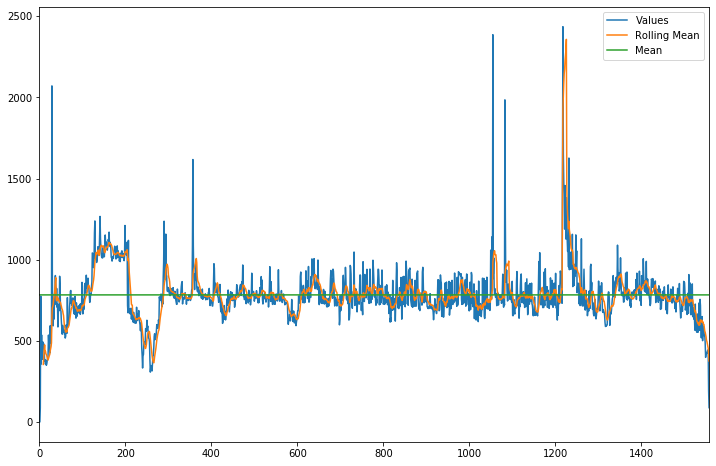

In [44]:
# dl.plot(figsize=(12,8))

In [36]:
# dl_ = estimativa_step(df, 5000)
# dl_.Mean[0]

1016

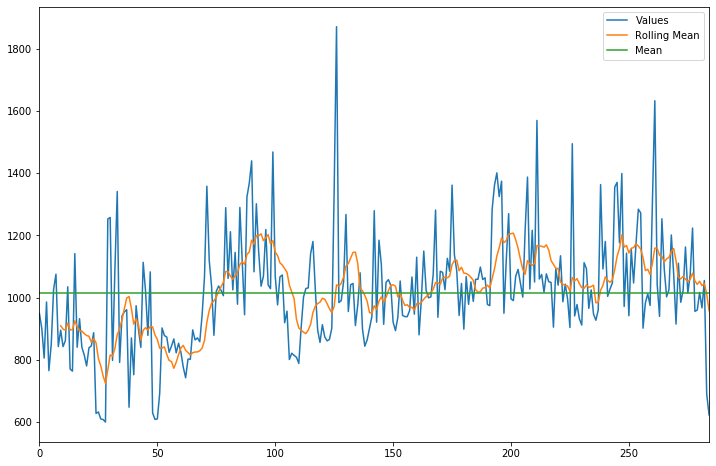

In [37]:
# dl_.plot(figsize=(12,8))

In [32]:
# dl_ = estimativa_step(df, 5000)
# dl_.Mean[0]

744

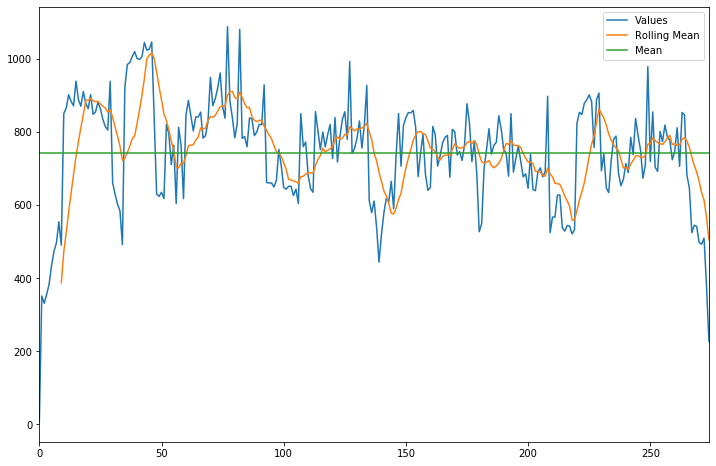

In [33]:
# dl_.plot(figsize=(12,8))

In [15]:
def estimativa_time(dataframe, timedelta_):
    A=[]
    D= []
    aux10 = 0
    for k in range (1, len(dataframe.index)):
        if (dataframe.ts.values[k] - dataframe.ts.values[aux10]) / np.timedelta64(1, 'ms') >= timedelta_:
            aux10 = k
            A.append(k)
    for i in range(0, len(A)-1):    
        vector= dataframe.gap.values[A[i]:A[1+i]]
        a = np.count_nonzero(vector == 1)
        b = (dataframe.ts.values[A[1+i]] - dataframe.ts.values[A[i]]) / np.timedelta64(1, 'ms') #+ (dataframe.micro.values[A[1+i]] - dataframe.micro.values[A[i]])
        c= dataframe.order_id.values[A[1+i]] - dataframe.order_id.values[A[i]]
        D.append((c-a)/b)
    dh = pd.DataFrame(D).rename({0:'Values'}, axis =1)
    aux1 = dh [ (dh['Values'] < 100) & (dh['Values'] > 0) ]
    aux1['Rolling Mean'] = aux1['Values'].rolling(window=10).mean()
    m = aux1['Values'].mean()
    aux1['Mean'] = float(m)
    
        #dh['step'] = str(step)
        
    return aux1

In [46]:
# dh  = estimativa_time(df, 100)

In [38]:
dh[['Rolling Mean', 'Mean']]

,Rolling Mean,Mean
1,nan,0.753221
2,nan,0.753221
8,nan,0.753221
10,nan,0.753221
17,nan,0.753221
...,...,...
313586,0.087550,0.753221
313587,0.088830,0.753221
313588,0.087827,0.753221
313589,0.087864,0.753221


In [12]:
# dl.head(10)

In [13]:
# dh.head()

In [14]:
# dh = aux4

In [15]:
# os.chdir('/bigdata')

In [16]:
# dh.to_csv('november.csv', sep =',', header = True, index = False)

In [17]:
import plotly.graph_objects as go
from ipywidgets import widgets

# df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
# df = df.drop(df.columns[[0]], axis=1)

# month = widgets.IntSlider(
#     value=1.0,
#     min=1.0,
#     max=12.0,
#     step=1.0,
#     description='Month:',
#     continuous_update=False
# )

use_time = widgets.Checkbox(
    placeholder='Type something',
    description='Time:',
    value=False,
)

textbox = widgets.Text(
    placeholder='Type something',
    description='Dia:',
     value='2019-11-05',
#      options='2019-11-01'#dh['Dia'].unique().tolist()
)


progress = widgets.IntProgress(
    value=1,
    min=0,
    max=150,
    step=1,
    description='Loading:',
    bar_style='success', #'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

update_btn = widgets.Button(description='Update', button_style='success')


origin_time = widgets.Dropdown(
#     options=list(dh['step'].unique()),
    placeholder='Type something',
    value=200,
    description='Time(ms):',
    options = [10,50,100,200,500]
)

origin_step = widgets.Dropdown(
#     options=list(dh['step'].unique()),
    placeholder='Type something',
    value=5000,
    description='Steps:',
    options = [1000,5000,10000,20000]
    
)


container = widgets.HBox(children=[use_time, origin_time])


In [18]:
a = table(textbox.value)

In [19]:
# b= estimativa_time(a,100)

In [20]:
# b [ b['Values'] < 0]

In [21]:
# b.plot()

In [22]:
# from tqdm import tqdm, trange
# import time
#dl  = estimativa_time(a, origin_time.value)
dh = estimativa_step(a, origin_step.value)


In [23]:
import time
from tqdm import trange, tqdm_notebook

# Assign an empty figure widget with two traces
trace1 = go.Scatter(y=dh['Values'], opacity=0.75, name='Mensagens por segundo')
trace2 = go.Scatter(y=dh['Rolling Mean'], opacity=0.75, name='Rolling Mean')
trace3 = go.Scatter(y=dh['Mean'], opacity=0.75, name='Mean')

g = go.FigureWidget(data=[trace1, trace2, trace3],
                    layout=go.Layout(
                        title=dict(
                            text='Mensagens por segundo'
                        ),
                        barmode='overlay'
                    ))




# def validate():
#     if origin.value in dh['step'].unique() and textbox.value in dh['Dia'].unique():
#         return True
#     else:
#         return False


def response(change):
    if use_time.value:
                
        temp_df = estimativa_time(a, origin_time.value)
                                   
    else:
       
        temp_df = estimativa_step(a, origin_step.value)
        
    x1 = temp_df['Values']
    x2 = temp_df['Rolling Mean']
    x3 = temp_df['Mean']
    with g.batch_update():
        g.data[0].y = x1
        g.data[1].y = x2
        g.data[2].y = x3
        g.layout.barmode = 'overlay'
        g.layout.xaxis.title = 'Steps'
        g.layout.yaxis.title = 'Mensagens por segundo'

def on_btn_click(btn):
#      print('teste')
    for p in (range(150)):
        progress.value +=1
        time.sleep(1)
    progress.value = 0
    

update_btn.on_click(on_btn_click)

# widgets.VBox([ update_btn])


progress.observe(response, names="value")

origin_time.observe(response, names="value")

use_time.observe(response, names="value")

textbox.observe(response, names="value")

origin_step.observe(response, names="value")

textbox.observe(response, names="value")




# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

# container2 = widgets.HBox([origin])



container2 = widgets.HBox([origin_step, textbox, progress])
# container3 = widgets.HBox(children=[progess, origin_time])


container = widgets.HBox(children=[use_time, origin_time])
widgets.VBox([container,
              container2,
              g, update_btn])



In [23]:
# def on_btn_click(btn):
# #      print('teste')
#     for p in (range(150)):
#         progress.value +=1
#         time.sleep(1)
#     progress.value = 0
    
    

        
        
# update_btn.on_click(on_btn_click)

# widgets.VBox([update_btn
#               ])
